In [1]:
import polars as pl
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys
sys.path.append('../')

from exp.features import Features
from exp.models.cat import CatBoostModel
from exp.models.lgbm import LGBMModel
from exp.models.rf import RandomForestModel
from exp.models.rgf import RGFModel
from exp.models.xgb import XGBModel

import warnings
warnings.filterwarnings("ignore")

import gc
gc.enable()

/home/education/signate_scup2023/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pl.read_csv("../input/train.csv")
test = pl.read_csv("../input/test.csv")

In [3]:
from exp.features import FeatureSelecter


features = Features(train, test)
train, test = features.create_features()

selecter = FeatureSelecter(train, test)

predictions = pl.concat([train["price"].to_frame(), pl.DataFrame([None] * test.height, schema={"price": pl.Int64})])

In [4]:
selecter.get_dataframe("lgbm")[0].head(10)

year,cylinders,odometer,price,odometer_f,age,odometer/age,odometer/cylinders,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,lat,lng,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,condition_l,size_l,manufacturer_mean,fuel_mean,title_status_mean,transmission_mean,drive_mean,type_mean,paint_color_mean,state_mean,type_age_mean,type_odo_mean,manufacturer_age_mean,manufacturer_odo_mean,type_age_diff,type_odo_diff,manufacturer_age_diff,manufacturer_odo_diff,car_string_vec_norm2,car_string_vec_mean,car_string_vec_0,car_string_vec_1,car_string_vec_2,car_string_vec_3,car_string_vec_4,car_string_vec_5,car_string_vec_6,car_string_vec_7,car_string_vec_8,car_string_vec_9,car_string_vec_10,car_string_vec_11,car_string_vec_12,car_string_vec_13,car_string_vec_14,car_string_vec_15,car_string_vec_16,car_string_vec_17,car_string_vec_18,car_string_vec_19,car_string_vec_20,car_string_vec_21,car_string_vec_22,car_string_vec_23,car_string_vec_24,car_string_vec_25,car_string_vec_26,car_string_vec_27,car_string_vec_28,car_string_vec_29,car_string_vec_30,car_string_vec_31,car_string_vec_32,car_string_vec_33,car_string_vec_34,car_string_vec_35,car_string_vec_36,car_string_vec_37,car_string_vec_38,car_string_vec_39,car_string_vec_40,car_string_vec_41,car_string_vec_42,car_string_vec_43,car_string_vec_44,car_string_vec_45,car_string_vec_46,car_string_vec_47,car_string_vec_48,car_string_vec_49,car_string_vec_50,car_string_vec_51,car_string_vec_52,car_string_vec_53,car_string_vec_54,car_string_vec_55,car_string_vec_56,car_string_vec_57,car_string_vec_58,car_string_vec_59,car_string_vec_60,car_string_vec_61,car_string_vec_62,car_string_vec_63,car_string_vec_64,car_string_vec_65,car_string_vec_66,car_string_vec_67,car_string_vec_68,car_string_vec_69,car_string_vec_70,car_string_vec_71,car_string_vec_72,car_string_vec_73,car_string_vec_74,car_string_vec_75,car_string_vec_76,car_string_vec_77,car_string_vec_78,car_string_vec_79,car_string_vec_80,car_string_vec_81,car_string_vec_82,car_string_vec_83,car_string_vec_84,car_string_vec_85,car_string_vec_86,car_string_vec_87,car_string_vec_88,car_string_vec_89,car_string_vec_90,car_string_vec_91,car_string_vec_92,car_string_vec_93,car_string_vec_94,car_string_vec_95,car_string_vec_96,car_string_vec_97,car_string_vec_98,car_string_vec_99,manufacturer_acura,manufacturer_alfa_romeo,manufacturer_aston_martin,manufacturer_audi,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land_rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes_benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_other,drive_4wd,drive_fwd,type_SUV,type_bus,type_coupe,type_hatchback,type_mini-van,type_nan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state

In [5]:
predictions = pl.concat([train["price"].to_frame(), pl.DataFrame([None] * test.height, schema={"price": pl.Int64})])

In [6]:
lgbm = LGBMModel(*selecter.get_dataframe("lgbm"))
#lgbm.objective(20)
lgbm.best_params = {'num_leaves': 48, 'max_depth': 6, 'min_child_samples': 91, 'subsample': 0.5578230915019112, 'colsample_bytree': 0.5933052522026404, 'reg_alpha': 2.4725566626090776e-05, 'reg_lambda': 1.0114136512530978e-08, 'feature_fraction': 0.7523757350552451, 'bagging_fraction': 0.9199865329355417, 'bagging_freq': 5}
lgbm_predictions = lgbm.predict()
predictions = pl.concat([predictions, lgbm_predictions], how="horizontal")

Fold_lgbm 0: 0.4388286116285743
Fold_lgbm 1: 0.4457774185466846
Fold_lgbm 2: 0.4480387461552112
Fold_lgbm 3: 0.44601372480524343
Fold_lgbm 4: 0.4471223371157744


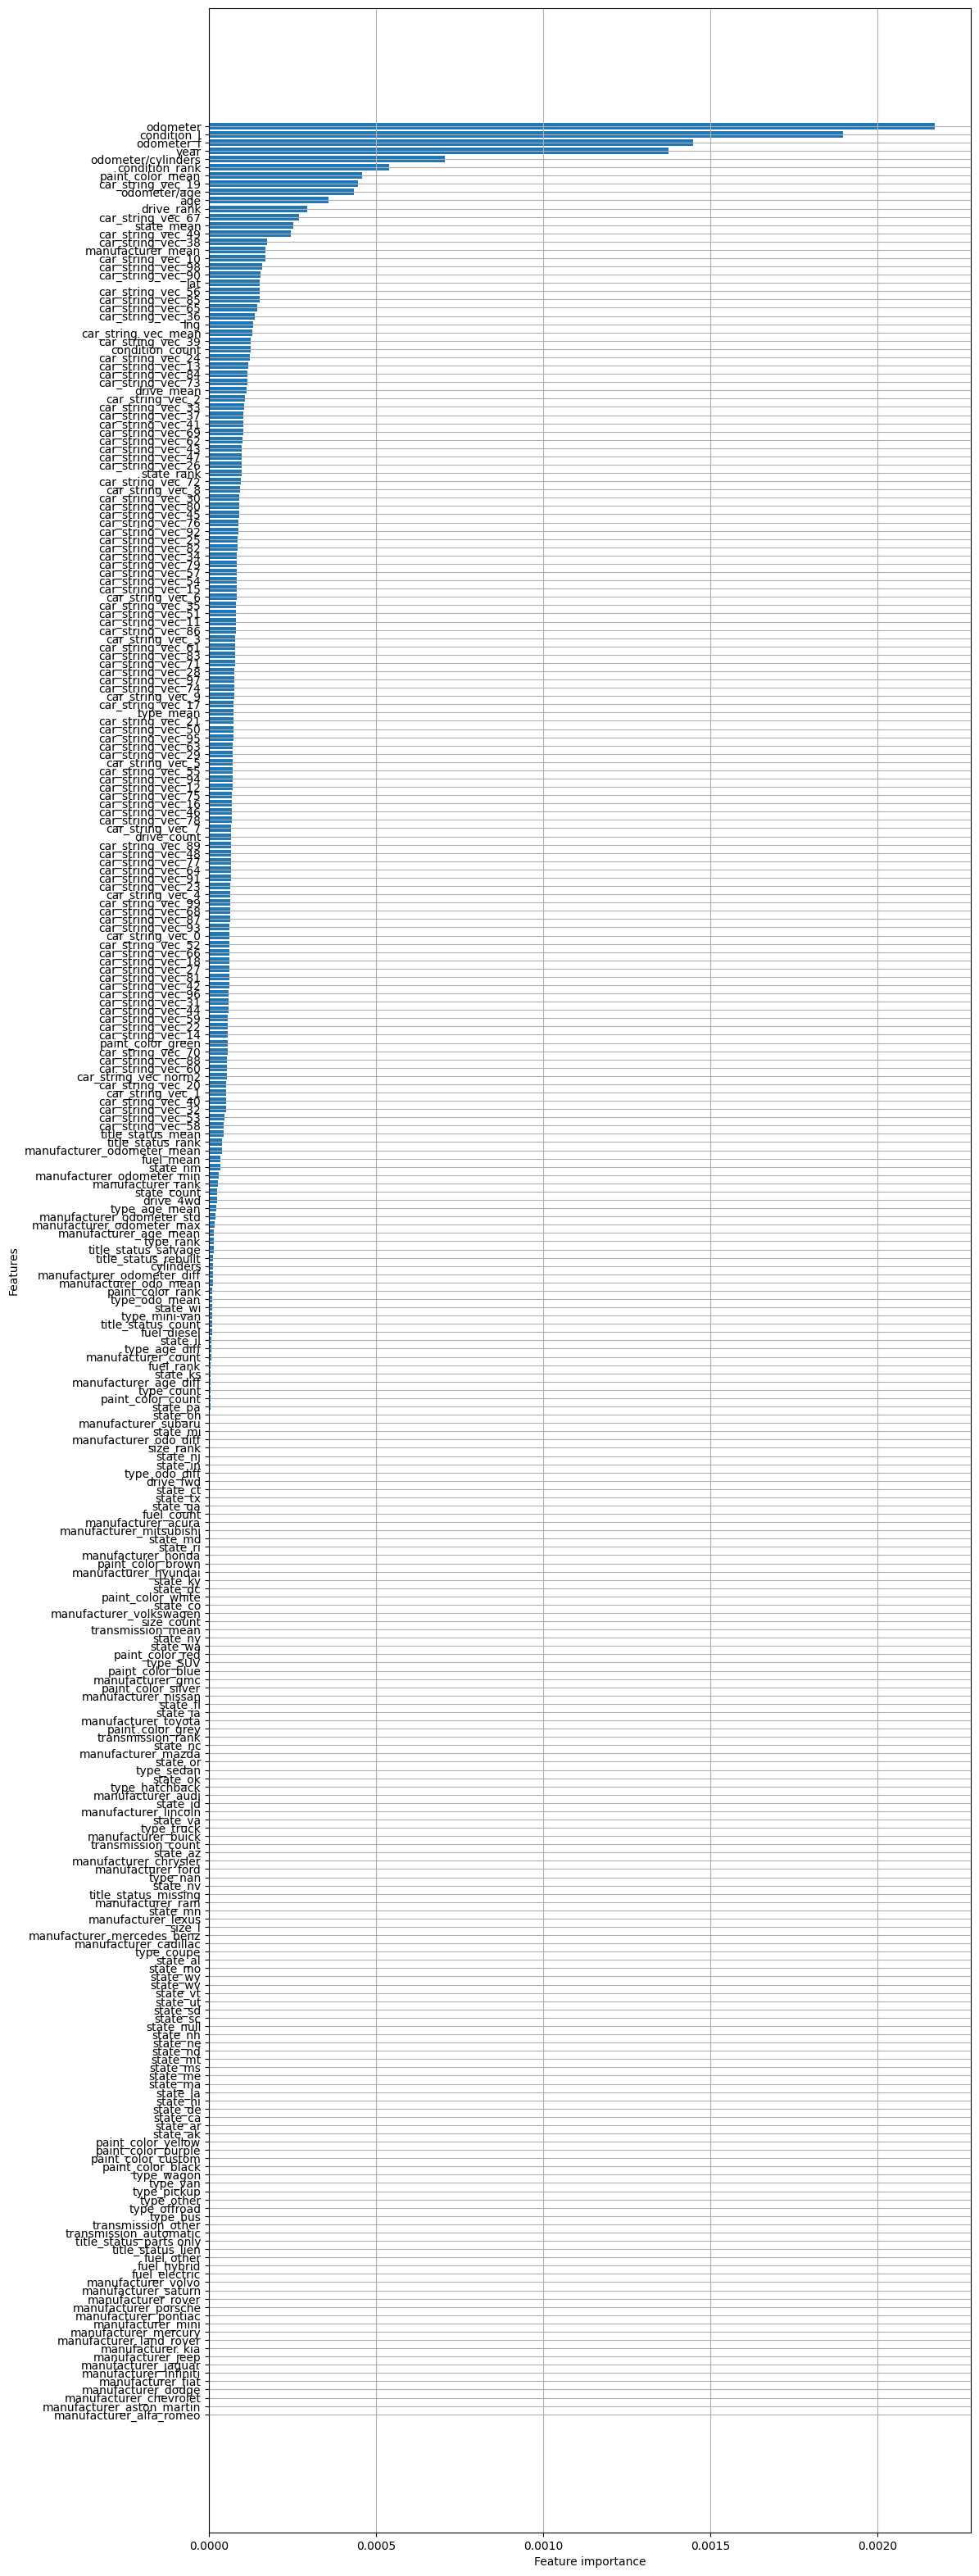

In [7]:
importance = lgbm.feature_importance()
importance = importance.sort(by='lgbm_importance_mean')
#グラフ表示
plt.figure(figsize=(12, 40))
plt.barh(importance['feature'], importance['lgbm_importance_mean'])
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.grid()
plt.show()

In [8]:
#xgb = XGBModel(train, test)
#xgb.objective(20)
#xgb.best_params = {'n_estimators': 767, 'max_depth': 8, 'lambda': 1.2306916748991704e-06, 'alpha': 0.018078104089246788, 'colsample_bytree': 0.42319770953022684, 'subsample': 0.2810517802368746, 'min_child_weight': 218, 'gamma': 6.031109467976734e-08, 'eta': 0.018889170085640027}
#xgb_predictions = xgb.predict()
#predictions = pl.concat([predictions, xgb_predictions], how="horizontal")

In [9]:
#rf = RandomForestModel(df)
##rf.objective(5)
#rf.best_params = {'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 14, 'max_features': 0.6306125661502896, 'max_leaf_nodes': 18, 'n_estimators': 8762, 'bootstrap': True}
#rf_predictions = rf.predict()
#predictions = pd.concat([predictions, rf_predictions], axis=1)

In [10]:
#rgf = RGFModel(df)
##rgf.objective(5)
#rgf.best_params = {'max_leaf': 8072, 'algorithm': 'RGF_Opt', 'test_interval': 142, 'min_samples_leaf': 11, 'reg_depth': 9, 'l2': 0.0002082492344277923, 'sl2': 4.2919223241162815e-07, 'normalize': False}
#rgf_predictions = rgf.predict()
#predictions = pd.concat([predictions, rgf_predictions], axis=1)

In [11]:
#cat = CatBoostModel(df)
##cat.objective(5)
#cat.best_params = {"depth": 6}
#cat_predictions = cat.predict()
#predictions = pd.concat([predictions, cat_predictions], axis=1)

In [12]:
predictions.head()

price,lgbm_pred_0,lgbm_pred_1,lgbm_pred_2,lgbm_pred_3,lgbm_pred_4
i64,f64,f64,f64,f64,f64
27587,6475.360962,6317.336262,6512.714914,6284.510979,6856.840317
4724,3741.859131,3406.038739,3745.184782,3696.35857,4014.301081
10931,3616.253788,3563.785505,3579.68434,3567.436094,3889.55517
16553,8692.247959,8580.215015,8805.202428,8824.936486,8796.534014
5158,4418.606547,4702.962837,4690.460176,4488.080708,4781.999292


In [13]:
#model = Ridge(random_state=0)
#train = predictions[predictions["price"].notnull()]
#test = predictions[predictions["price"].isnull()]
#X_train = train.drop(["price"], axis=1)
#y_train = train["price"]
#X_test = test.drop(["price"], axis=1)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [14]:
y_pred = lgbm_predictions.mean(axis=1)[train.height:].to_list()

In [15]:
#sub = pl.read_csv(os.path.join(os.path.dirname(__file__), "../input/submit_sample.csv"), has_header=False, new_columns=["id", "price"])
#sub = sub.with_columns(pl.Series("", y_pred).alias("price"))
#sub.write_csv(os.path.join(os.path.dirname(__file__), "../output/submission_te0810_3.csv"), has_header=False)